### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.data_analyzer import DataAnalyzer as data_analyzer

In [4]:
config_f_name = 'base/TCR-128-28-0.25_TCO_DCES.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/base/TCR-128-28-0.25_TCO_DCES.jsonc
2024-05-21 16:25:50,-1685368012 | INFO | 2558796 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/base/TCR-128-28-0.25_TCO_DCES.jsonc Run: 2
2024-05-21 16:25:50,-1685367997 | INFO | 2558796 - Creating the evaluation manager....................................
2024-05-21 16:25:50,-1685367985 | INFO | 2558796 - Creating the paired  evaluators.....................................
2024-05-21 16:25:50,-1685367417 | INFO | 2558796 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-21 16:25:51,-1685367156 | INFO | 2558796 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-21 16:25:51,-1685366874 | INFO | 2558796 - Creating: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
2024-05-21 16:25:51,-1685366862 | INFO | 2558796 - TreeCyclesOracle trained in: 0.010700464248657227 secs
2024-05-21 16:25:51,-1685366686 | INFO | 2558796 - Saved:

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-21 16:26:35,-1685322421 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-21 16:26:35,-1685322400 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-21 16:26:36,-1685322399 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-21 16:26:36,-1685322371 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-21 16:26:36,-1685322340 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-21 16:26:36,-1685322309 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-21 16:26:36,-1685322308 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-21 16:26:36,-1685322255 | INFO | 2558796 - Instantiating: src.evaluation.evaluation_metric_runtime.Runt

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationRandom,1.109342,0.000000,1.900000,0.000000,462.625000,0.000000,0.781250,0.0,0.026422,0.000000,0.750000,0.000000,0.984375,0.000000
1,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.236774,0.000000,1.314050,0.000000,164.640625,0.000000,0.945312,0.0,0.022194,0.000000,0.945312,0.000000,1.000000,0.000000
2,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,DCESExplainer,0.086789,0.000000,44.679688,0.000000,129.000000,0.000000,1.000000,0.0,0.801405,0.000000,1.000000,0.000000,1.000000,0.000000
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,4.155696,0.326201,9.921818,1.731923,1019.548182,115.468089,1.000000,0.0,0.012867,0.002268,0.547273,0.316118,0.773636,0.158059


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1].top

In [10]:
inst_cf_pairs[2][1].explainer.name

'DCESExplainer-29a5ef78594a6990dfd78d4c9ff9430d'

In [11]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [12]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(0, 20), (1, 13), (1, 14), (3, 20), (4, 8), (6, 7), (6, 14), (6, 17), (7, 19), (9, 16), (9, 26), (10, 13), (11, 12), (12, 15), (15, 21), (16, 19), (16, 20), (18, 20), (21, 22), (22, 23), (24, 25), (24, 27), (25, 26), (26, 27)]
removed_edges: [(0, 11), (0, 13), (0, 14), (0, 26), (1, 23), (3, 4), (3, 18), (4, 7), (4, 23), (5, 9), (5, 10), (5, 24), (6, 25), (8, 16), (9, 17), (10, 18), (11, 23), (12, 22), (12, 27), (13, 19), (16, 25), (20, 22)]
added nodes: []
removed nodes: []


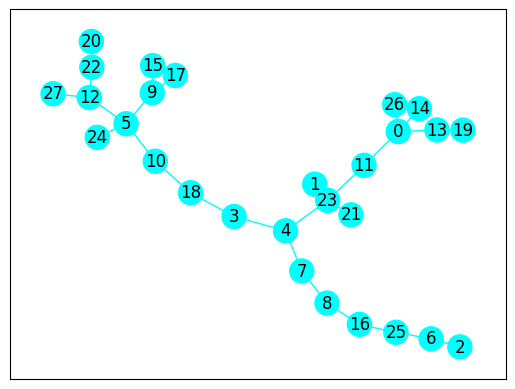

In [13]:
pos = data_analyzer.draw_graph(og_inst)

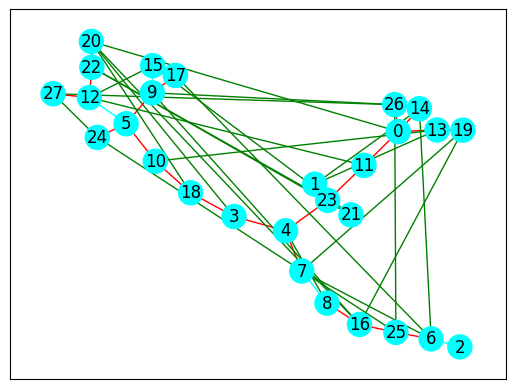

In [14]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)